# Synchronising two cameras

## Plan:
1. Record from two cameras almost simultaneously
2. Save videos before synchronising
3. Synchronise using audio
4. Save synchronise videos

## 1. Record from two cameras almost simultaneously

In [1]:
import numpy as np
import cv2 as cv
import time
import matplotlib.pyplot as plt

In [2]:
## parameters for recording the videos
# Resolution of the cameras
WFrame = 1280
HFrame = 720

# fps
FPS = 30
VideoL= 7 # video length in s

# Video name
Nvideo= '1'
VideoA = '.\Videos\Example_videoA'+Nvideo+'.avi'
VideoB = '.\Videos\Example_videoB'+Nvideo+'.avi'
VideoConcat = '.\Videos\Example_video_concat_'+Nvideo+'.avi'
Time_info ='.\Videos\Example_video_'+Nvideo+'_t'

t = np.empty((int(VideoL*FPS*1.2),))
t[:] = np.nan

##camera_url='http://192.168.100.7:4747/video/force/1280x720'

5.961878776550293
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1

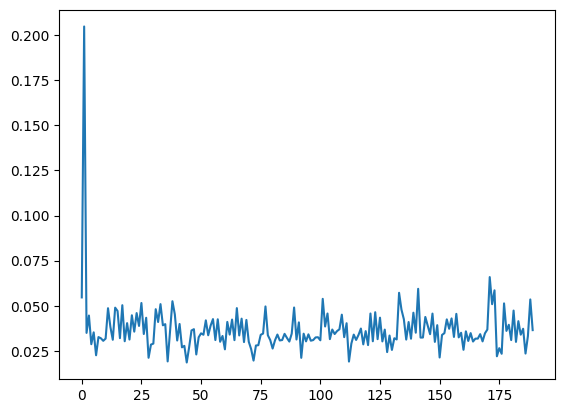

In [3]:
t0 = time.time()
cap = cv.VideoCapture(0, cv.CAP_DSHOW)
cap.set(cv.CAP_PROP_FRAME_WIDTH, WFrame)
cap.set(cv.CAP_PROP_FRAME_HEIGHT, HFrame)
cap.set(cv.CAP_PROP_FPS, int(FPS))
cap.set(cv.CAP_PROP_FOURCC, cv.VideoWriter_fourcc('M', 'J', 'P', 'G'))

#cap1 = cv.VideoCapture(camera_url)
cap1 = cv.VideoCapture(1, cv.CAP_DSHOW)
cap1.set(cv.CAP_PROP_FRAME_WIDTH, WFrame)
cap1.set(cv.CAP_PROP_FRAME_HEIGHT, HFrame)
cap1.set(cv.CAP_PROP_FPS, int(FPS))
cap1.set(cv.CAP_PROP_FOURCC, cv.VideoWriter_fourcc('M', 'J', 'P', 'G'))

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
fourcc1 = cv.VideoWriter_fourcc(*'XVID')


out = cv.VideoWriter(VideoA, fourcc, FPS, (WFrame,  HFrame))
out1 = cv.VideoWriter(VideoB, fourcc1, FPS, (WFrame,  HFrame))

counter = 1;

## forsome easons the first frames are slower, so we take them out of the loop
ret, frame = cap.read()
ret1, frame1 = cap1.read()
while cap.isOpened():

    ## get images from both cameras
    ret, frame = cap.read()
    ret1, frame1 = cap1.read()

    if not ret or not ret1:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    if counter == 1:  
        t[0] = time.time()
        print(t[0]-t0)
    else:
        t[counter-1] = time.time()-t[0]

    
     
    
    if np.mod(counter,2) == 0:
    # contatenate for displaying purposes
        print(np.shape(frame))
        print(np.shape(frame1))
        frame_cat = cv.hconcat([frame,frame1])
        cv.imshow('frame', frame_cat)
        if cv.waitKey(1) != -1:
            break

        
    # write the frames in both videos
    out.write(frame)
    out1.write(frame1)
    #out2.write(frame_cat)
    

    elapsed = time.time() - t[0]
    counter = counter+1
    
    
    #if (cv.waitKey(1) & 0xFF == ord('q')) or elapsed>=VideoL:
    #    break
    # This option is faster but it doesn't show the video while recording
    if  elapsed>=VideoL:
        break

# Release everything if job is finished
cap.release()
cap1.release()

out.release()
out1.release()
#out2.release()
cv.destroyAllWindows()

t[0] = 0;

print('Number of frames taken = ', counter-1)
print('estimated FPS  = ', (counter-1)/elapsed)
print()
plt.plot(np.diff(t))
np.savez(Time_info, t=t)

## Create a video side by side

In [4]:
# open videos
capA = cv.VideoCapture(VideoA)
capB = cv.VideoCapture(VideoB)

# create a cap to contatenated videos
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter(VideoConcat, fourcc, FPS, (int(WFrame*2),  int(HFrame)))


if (capA.isOpened()== False) or (capB.isOpened()== False): 
    print("Error opening video file")


while(capA.isOpened()):
    
# Capture frame-by-frame
    retA, frameA = capA.read()
    retB, frameB = capB.read()
    if retA == True and retB == True:
        
        #concat frames and resize
        frameCat = cv.hconcat([frameA,frameB])
    # Display the resulting frame
        #cv.imshow('Frame', frameCat)
        out.write(frameCat)
    # Press Q on keyboard to exit
       # if cv.waitKey(25) & 0xFF == ord('q'):
       #     break

# Break the loop
    else:
        break

# When everything done, release
# the video capture object
capA.release()
capB.release()
out.release()

# Closes all the frames
cv.destroyAllWindows()